In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [7]:
for col in df_train.keys():
    print(df_train.isna()[col].value_counts())
    print('----------------------------------')

False    891
Name: PassengerId, dtype: int64
----------------------------------
False    891
Name: Survived, dtype: int64
----------------------------------
False    891
Name: Pclass, dtype: int64
----------------------------------
False    891
Name: Name, dtype: int64
----------------------------------
False    891
Name: Sex, dtype: int64
----------------------------------
False    714
True     177
Name: Age, dtype: int64
----------------------------------
False    891
Name: SibSp, dtype: int64
----------------------------------
False    891
Name: Parch, dtype: int64
----------------------------------
False    891
Name: Ticket, dtype: int64
----------------------------------
False    891
Name: Fare, dtype: int64
----------------------------------
True     687
False    204
Name: Cabin, dtype: int64
----------------------------------
False    889
True       2
Name: Embarked, dtype: int64
----------------------------------


In [9]:
for col in df_test.keys():
    print(df_test.isna()[col].value_counts())
    print('----------------------------------')

False    418
Name: PassengerId, dtype: int64
----------------------------------
False    418
Name: Pclass, dtype: int64
----------------------------------
False    418
Name: Name, dtype: int64
----------------------------------
False    418
Name: Sex, dtype: int64
----------------------------------
False    332
True      86
Name: Age, dtype: int64
----------------------------------
False    418
Name: SibSp, dtype: int64
----------------------------------
False    418
Name: Parch, dtype: int64
----------------------------------
False    418
Name: Ticket, dtype: int64
----------------------------------
False    417
True       1
Name: Fare, dtype: int64
----------------------------------
True     327
False     91
Name: Cabin, dtype: int64
----------------------------------
False    418
Name: Embarked, dtype: int64
----------------------------------


In [10]:
y_train = df_train['Survived']
x_train = df_train[['Sex', 'Age', 'Fare', 'Pclass']]
x_test = df_test[['Sex', 'Age', 'Fare', 'Pclass']]

# Preprocessing

In [13]:
def get_dummies(df, col, values):
    for val in values:
        new_col = 'Is_' + val
        df[new_col] = (df[col] == val).astype(int)
    del df[col]
    return df

In [14]:
x_train = get_dummies(x_train, 'Sex', ['femeale', 'male'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
x_test = get_dummies(x_test, 'Sex', ['femeale', 'male'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [52]:
x_train['Age'].fillna(x_train['Age'].mean(), inplace=True)
x_test['Age'].fillna(x_test['Age'].mean(), inplace=True)

x_test['Fare'].fillna(x_test['Fare'].mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [53]:
for col in x_train.keys():
    print(x_train.isna()[col].value_counts())
    print('----------------------------------')

False    891
Name: Age, dtype: int64
----------------------------------
False    891
Name: Fare, dtype: int64
----------------------------------
False    891
Name: Pclass, dtype: int64
----------------------------------
False    891
Name: Is_femeale, dtype: int64
----------------------------------
False    891
Name: Is_male, dtype: int64
----------------------------------


In [54]:
for col in x_test.keys():
    print(x_test.isna()[col].value_counts())
    print('----------------------------------')

False    418
Name: Age, dtype: int64
----------------------------------
False    418
Name: Fare, dtype: int64
----------------------------------
False    418
Name: Pclass, dtype: int64
----------------------------------
False    418
Name: Is_femeale, dtype: int64
----------------------------------
False    418
Name: Is_male, dtype: int64
----------------------------------


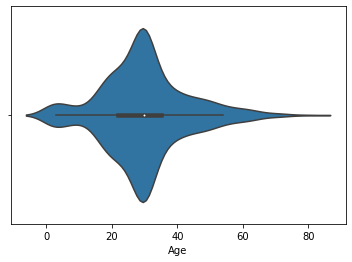

In [23]:
sns.violinplot(x_train['Age'])

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [42]:
model = DecisionTreeClassifier(random_state=0)

In [43]:
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [44]:
model.feature_importances_

array([0.26076109, 0.30688109, 0.12118198, 0.        , 0.31117584])

[Text(112.46671258223685, 213.0912, 'X[4] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(54.57019736842106, 204.3936, 'X[2] <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(19.383157894736843, 195.696, 'X[0] <= 2.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(12.922105263157896, 186.9984, 'X[1] <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(10.57263157894737, 178.3008, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(15.271578947368424, 178.3008, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(25.84421052631579, 186.9984, 'X[1] <= 28.856\ngini = 0.091\nsamples = 168\nvalue = [8, 160]'),
 Text(19.970526315789478, 178.3008, 'X[1] <= 28.231\ngini = 0.182\nsamples = 69\nvalue = [7, 62]'),
 Text(17.621052631578948, 169.60320000000002, 'X[0] <= 56.0\ngini = 0.161\nsamples = 68\nvalue = [6, 62]'),
 Text(12.922105263157896, 160.9056, 'X[0] <= 23.5\ngini = 0.14\nsamples = 66\nvalue = [5, 61]'),
 Text(10.57263157894737, 152.208, 'gini = 0

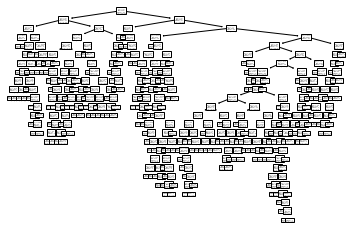

In [45]:
tree.plot_tree(model)

# Prediction

In [46]:
y_train_pred = model.predict(x_train)

In [50]:
accuracy_score(y_train, y_train_pred)

0.9797979797979798

In [55]:
y_test_pred = model.predict(x_test)
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred['PassengerId'] = df_test['PassengerId']
y_test_pred.columns = ['Survived', 'PassengerId']
y_test_pred = y_test_pred.reindex(sorted(y_test_pred.columns), axis = 1)
y_test_pred.to_csv('pred_it2.csv', index=False)